In [1]:

using LinearAlgebra
using SpecialFunctions
using AssociatedLegendrePolynomials
using Plots
using LaTeXStrings

In [2]:

# import conventions
include("conventions.jl")
  using .conventions: big_endian, qubit_begin

  # import quantum gates
include("quantum_gates.jl")
using ..quantum_gates: Qgate, Rz_gate1

include("lib_tensor/QTensor.jl")
using ..QTensor: Qgate_T2D

include("quantum_circuit.jl")
using ..quantum_circuit: qc_initialize, init_register, show_statevector, apply_op
#using ..quantum_circuit: qc_initialize, init_register, print_initstate

Load quantum gates constructor


Load Tensor module: QTensor.jl
Load quantum gates constructor


Load quantum gates constructor
Load quantum gates constructor


### quantum sensor test 

In [3]:
qubit_control = 0
qubit_target = 1
nqubits = 3
err_tol = 1e-8
qc = qc_initialize(nqubits)


Main.quantum_circuit.qc_initstruct(3, "big-endian", 2, 8, [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0 0.0 0.0; 0.0 0.0 1.0; … ; 1.0 1.0 0.0; 1.0 1.0 1.0])

In [4]:
show_statevector(qc)

The initial state of the quantum register is: 
The initial state of the quantum register with the 
    quantum states in the computational basis is: 
1.0 * | [0, 0, 0]>
0.0 * | [0, 0, 1]>
0.0 * | [0, 1, 0]>
0.0 * | [0, 1, 1]>
0.0 * | [1, 0, 0]>
0.0 * | [1, 0, 1]>
0.0 * | [1, 1, 0]>
0.0 * | [1, 1, 1]>


#### testing the rotational gate
$R_Z(\phi)$.

syntax for the gate is: `Rz_gate = Qgate.Rz(phi)`

where `phi` is the angle of rotation.

In [8]:
# a gate from the Qgate library implemented from the paper 
# arXiv:2209.08187v1 [quant-ph] 16 Sep 2022
# test angle 2.0
Rz_gate = Rz_gate1(2.0)


2×2 Matrix{ComplexF64}:
 0.540302-0.841471im       0.0+0.0im
      0.0+0.0im       0.540302+0.841471im

In [9]:
show(stdout, "text/plain", Rz_gate)

2×2 Matrix{ComplexF64}:
 0.540302-0.841471im       0.0+0.0im
      0.0+0.0im       0.540302+0.841471im

### ===============================

Now, we start with the implementation of the quantum circuit simulating the quantum sensor.

In [12]:
qubit_control = 0
qubit_target = 1
# Start with one qubit only and one classical bit to recieve the answer
nqubits = 1
#err_tol = 1e-15
qc = qc_initialize(nqubits)

Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, [1.0, 0.0], [0, 1])

In [13]:
# check the state vector of the quantum register
qc.state_vector

2-element Vector{Float64}:
 1.0
 0.0

In [14]:
# check the quantum states, the basis of the Hilbert space of the qubits
qc.q_states

2-element Vector{Int64}:
 0
 1

In [15]:
# print the state vector with the basis of the quantum register
show_statevector(qc)

The initial state of the quantum register is: 
The initial state of the quantum register with the 
    quantum states in the computational basis is: 
1.0 * | [0]>
0.0 * | [1]>


In [17]:
# Get the Hadamard gate
 Hgate = Qgate.H
# Hgate'*Hgate   
# Qgate_dim = size(Hgate)
# U2_mat::Matrix{Union{ComplexF64, Float64}} = Hgate'*Hgate
# #UU::Matrix{Union} = Hgate'*Hgate
# err_tol = 1e-15
# II = Matrix(I, Qgate_dim[1], Qgate_dim[2])
#     if isapprox(U2_mat, II,rtol=err_tol) == false
#         error("The gate is not unitary")
#     end

2×2 Matrix{Float64}:
 0.707107   0.707107
 0.707107  -0.707107

In [18]:
# Apply the Hadamard gate to the quantum register
apply_op(qc, Hgate)

Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, [0.7071067811865475, 0.7071067811865475], [0, 1])

In [19]:
# Show the state vector of the quantum register
show_statevector(qc)

The initial state of the quantum register is: 
The initial state of the quantum register with the 
    quantum states in the computational basis is: 
0.7071067811865475 * | [0]>
0.7071067811865475 * | [1]>


In [20]:
# Apply the Rz gate as defined in the paper arXiv:2209.08187v1 [quant-ph] 16 Sep 2022
# a gate from the Qgate library implemented from the paper 
# arXiv:2209.08187v1 [quant-ph] 16 Sep 2022
# angle is phi = pi/3
Rz_gate = Rz_gate1(pi/3)
apply_op(qc, Rz_gate)

Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, ComplexF64[0.6123724356957945 - 0.3535533905932737im, 0.6123724356957945 + 0.3535533905932737im], [0, 1])

In [28]:
# Show the state vector of the quantum register
show_statevector(qc)

The initial state of the quantum register is: 
The initial state of the quantum register with the 
    quantum states in the computational basis is: 
0.8660254037844385 - 3.1116426608676864e-19im * | [0]>
-3.875697631374195e-18 - 0.49999999999999983im * | [1]>


In [23]:
# Apply the Hadamard gate to the quantum register
apply_op(qc, Hgate)

Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, ComplexF64[0.8660254037844385 - 3.1116426608676864e-19im, -3.875697631374195e-18 - 0.49999999999999983im], [0, 1])

In [24]:
show_statevector(qc)

The initial state of the quantum register is: 
The initial state of the quantum register with the 
    quantum states in the computational basis is: 
0.8660254037844385 - 3.1116426608676864e-19im * | [0]>
-3.875697631374195e-18 - 0.49999999999999983im * | [1]>


The final state is expressed as 
$$
|\psi\rangle=H R_Z(\phi) H|0\rangle
$$

In matrix notation: 
$$
|\psi\rangle=\frac{1}{2}\left[\begin{array}{l}
e^{-i \phi / 2}+e^{i \phi / 2} \\
e^{-i \phi / 2}-e^{i \phi / 2}
\end{array}\right]=\left[\begin{array}{c}
\cos (\phi / 2) \\
-i \sin (\phi / 2)
\end{array}\right]
$$

Here, the probabilities of measuring the final state of the circuit as $|0\rangle$ and $|1\rangle$ are given by $p_0=\cos ^2(\phi / 2)$ and $p_1=\sin ^2(\phi / 2)$, respectively.

We summarize the result of this measurement by defining the polarization operator $\hat{P}$ such that the polarization is equal to -1 if we measure $|0\rangle$ and equal to 1 if we measure $|1\rangle$. Up to the overall sign, this is the $z$ coordinate of the Bloch vector. In matrix form, the polarization operator is
$$
\hat{P}=\left[\begin{array}{cc}
-1 & 0 \\
0 & 1
\end{array}\right] .
$$
For the final state $|\psi\rangle$ from Eq. (7), the expectation value of the polarization operator is
$$
\langle\psi|\hat{P}| \psi\rangle=p_1-p_0=\frac{1}{2} \sin ^2(\phi / 2)-\frac{1}{2} \cos ^2(\phi / 2)=-\cos \phi
$$

The coefficients of state $|\psi\rangle$ expressed in the computational basis of a single qubit gives the probability of measuring the state $|0\rangle$ or $|1\rangle$.
The average polarization is given by 
$$
P = p_1 - p_0 
$$ 
with each measurement outcome.  

In [25]:
phi_vec = [0,pi/2,pi,3*pi/2,2*pi]

5-element Vector{Float64}:
 0.0
 1.5707963267948966
 3.141592653589793
 4.71238898038469
 6.283185307179586

Use the exact simulator approach, we can calculate the average polarization for a given $\phi$.

In [26]:
# calculate the polarization P for the phi_vec 
P = zeros(length(phi_vec))
for iphi = 1:length(phi_vec)
    phi = phi_vec[iphi]
    p0 = cos(phi/2)^2
    p1 = sin(phi/2)^2
    P[iphi] = p0 - p1
end

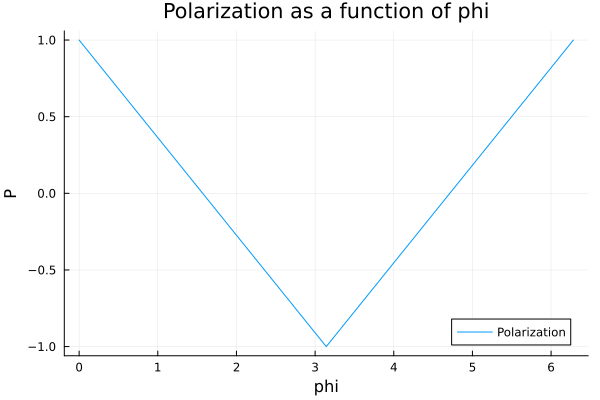

In [27]:
# plot P as a function of phi 
plot(phi_vec, P, label="Polarization", xlabel="phi", 
ylabel="P", title="Polarization as a function of phi")

# Apply the Rz gate as defined in the paper arXiv:2209.08187v1 [quant-ph] 16 Sep 2022

In [ ]:
## Emulate the sinusoidal behavior of the polarization P as a function of phi
P_polarization 

#### refs

https://quantumcomputing.stackexchange.com/questions/14066/how-do-i-apply-the-hadamard-gate-to-one-qubit-in-a-two-qubit-pure-state
